# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [27]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [28]:
dados = pd.read_csv('./housing.csv')
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
# Verificando valores únicos na variável
dados['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Uma breve observação, os dados da variável 'ocean_proximity' não são do tipo numérico e para treinar um modelo de machine learning, todos os dados devem ser numérios, nesse caso criarei um mapeamento.

- **'NEAR BAY':** 1,
- **'<1H OCEAN':** 2,
- **'INLAND':** 3,
- **'NEAR OCEAN':** 4,
- **'ISLAND':** 5

In [30]:
# Criando uma variável para transformar os dados da coluna 'ocean_proximity' em dados numéricos com o mapeamento especifico
mapping = {
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'INLAND': 3,
    'NEAR OCEAN': 4,
    'ISLAND': 5
}

dados['ocean_proximity_numeric'] = dados['ocean_proximity'].map(mapping)

# Criando uma nova coluna chamada 'ocean_proximity_numeric' com os valores numéricos correspondentes
dados['ocean_proximity'] = dados['ocean_proximity'].map(mapping)

dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,1


In [31]:
dados.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_numeric'],
      dtype='object')

In [32]:
dados.dtypes

longitude                  float64
latitude                   float64
housing_median_age         float64
total_rooms                float64
total_bedrooms             float64
population                 float64
households                 float64
median_income              float64
median_house_value         float64
ocean_proximity              int64
ocean_proximity_numeric      int64
dtype: object

In [33]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.464729,2.464729
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.854226,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.000000,3.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000,5.000000


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20433 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   median_house_value       20640 non-null  float64
 9   ocean_proximity          20640 non-null  int64  
 10  ocean_proximity_numeric  20640 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


In [35]:
dados.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms             207
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
ocean_proximity_numeric      0
dtype: int64

In [36]:
# tratando os dados nulos da variável 'total_bedrooms'
dados = dados.dropna(subset=['total_bedrooms'])

In [37]:
# Verificando se ainda há dados nulos
dados.isnull().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            0
ocean_proximity_numeric    0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [41]:
import matplotlib.pyplot as plt

matriz_correlacao = dados.corr()
matriz_correlacao

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000,1.000000


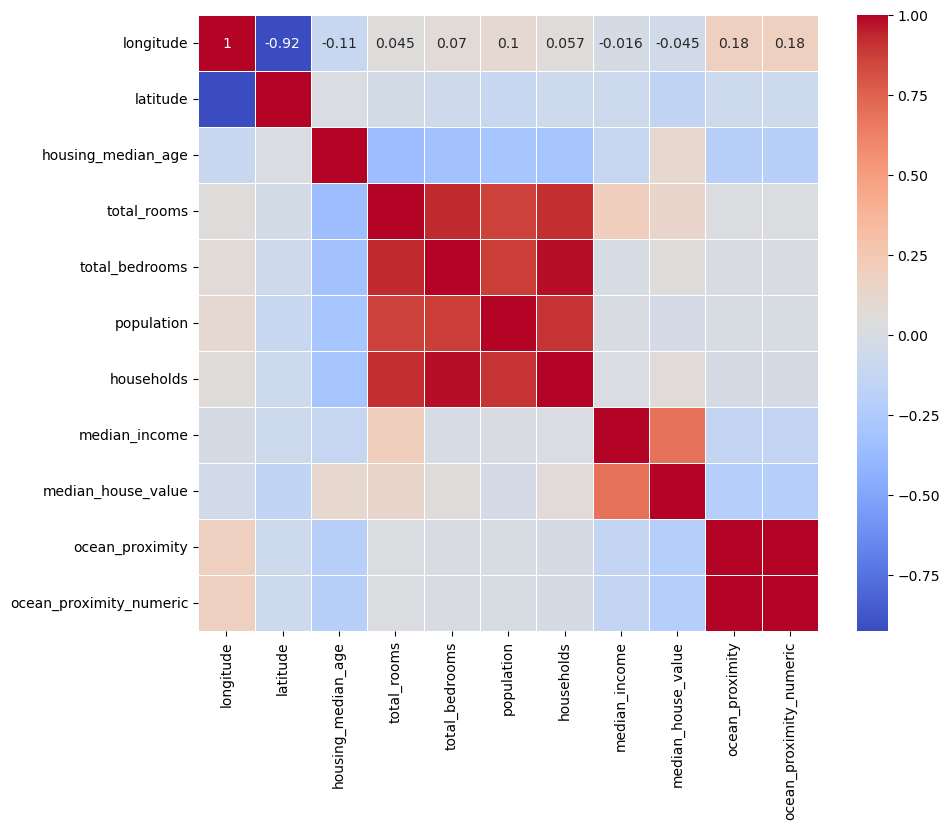

In [43]:
# Visualizando a matriz de correlação

# Configurações opcionais para a aparência do gráfico
plt.figure(figsize=(10, 8))

# Crie o heatmap da matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Exiba o gráfico
plt.show()

### 3. Separe os dados em validação e teste

In [46]:
# Definindo as variáveis independentes e dependente
X = dados[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
            'ocean_proximity_numeric']]
y = dados['median_house_value']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [47]:
# Modelo com profundidade máxima = 8
arvore_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_8.fit(X_train, y_train)

# Modelo com profundidade máxima = 2
arvore_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [48]:
from sklearn.metrics import mean_squared_error

# Previsões na base de treinamento
y_train_pred_8 = arvore_8.predict(X_train)
y_train_pred_2 = arvore_2.predict(X_train)

# Previsões na base de teste
y_test_pred_8 = arvore_8.predict(X_test)
y_test_pred_2 = arvore_2.predict(X_test)

# Calculando o MSE na base de treinamento
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)

# Calculando o MSE na base de teste
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibindo os resultados
print(f'MSE na base de treinamento (profundidade = 8): {mse_train_8:.2f}')
print(f'MSE na base de treinamento (profundidade = 2): {mse_train_2:.2f}')
print(f'MSE na base de teste (profundidade = 8): {mse_test_8:.2f}')
print(f'MSE na base de teste (profundidade = 2): {mse_test_2:.2f}')


MSE na base de treinamento (profundidade = 8): 3005683863.46
MSE na base de treinamento (profundidade = 2): 7301485444.05
MSE na base de teste (profundidade = 8): 3907783921.99
MSE na base de teste (profundidade = 2): 7608731340.05


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

### Insights

1. MSE na base de treinamento:
   - A árvore com profundidade = 8 tem um MSE significativamente menor na base de treinamento, indicando que ela se ajustou melhor aos dados de treino.
   - A árvore com profundidade = 2 tem um MSE maior, sugerindo que ela é um modelo mais simples e não se ajustou tão bem aos dados de treinamento.
2.  MSE na base de teste:
   - A árvore com profundidade = 8 também tem um MSE menor na base de teste em comparação com a árvore com profundidade = 2. Isso sugere que, apesar de     ser um modelo mais complexo, a árvore com profundidade = 8 está generalizando melhor do que a árvore mais simples.

     **Conclusão:** A árvore com profundidade = 8 parece mais adequada, pois tem um MSE menor tanto na base de treinamento quanto na base de teste. Isso indica que o modelo com profundidade maior é capaz de capturar melhor os padrões nos dados, sem sofrer de overfitting significativo, visto que o MSE na base de teste não é drasticamente maior do que na base de treinamento.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

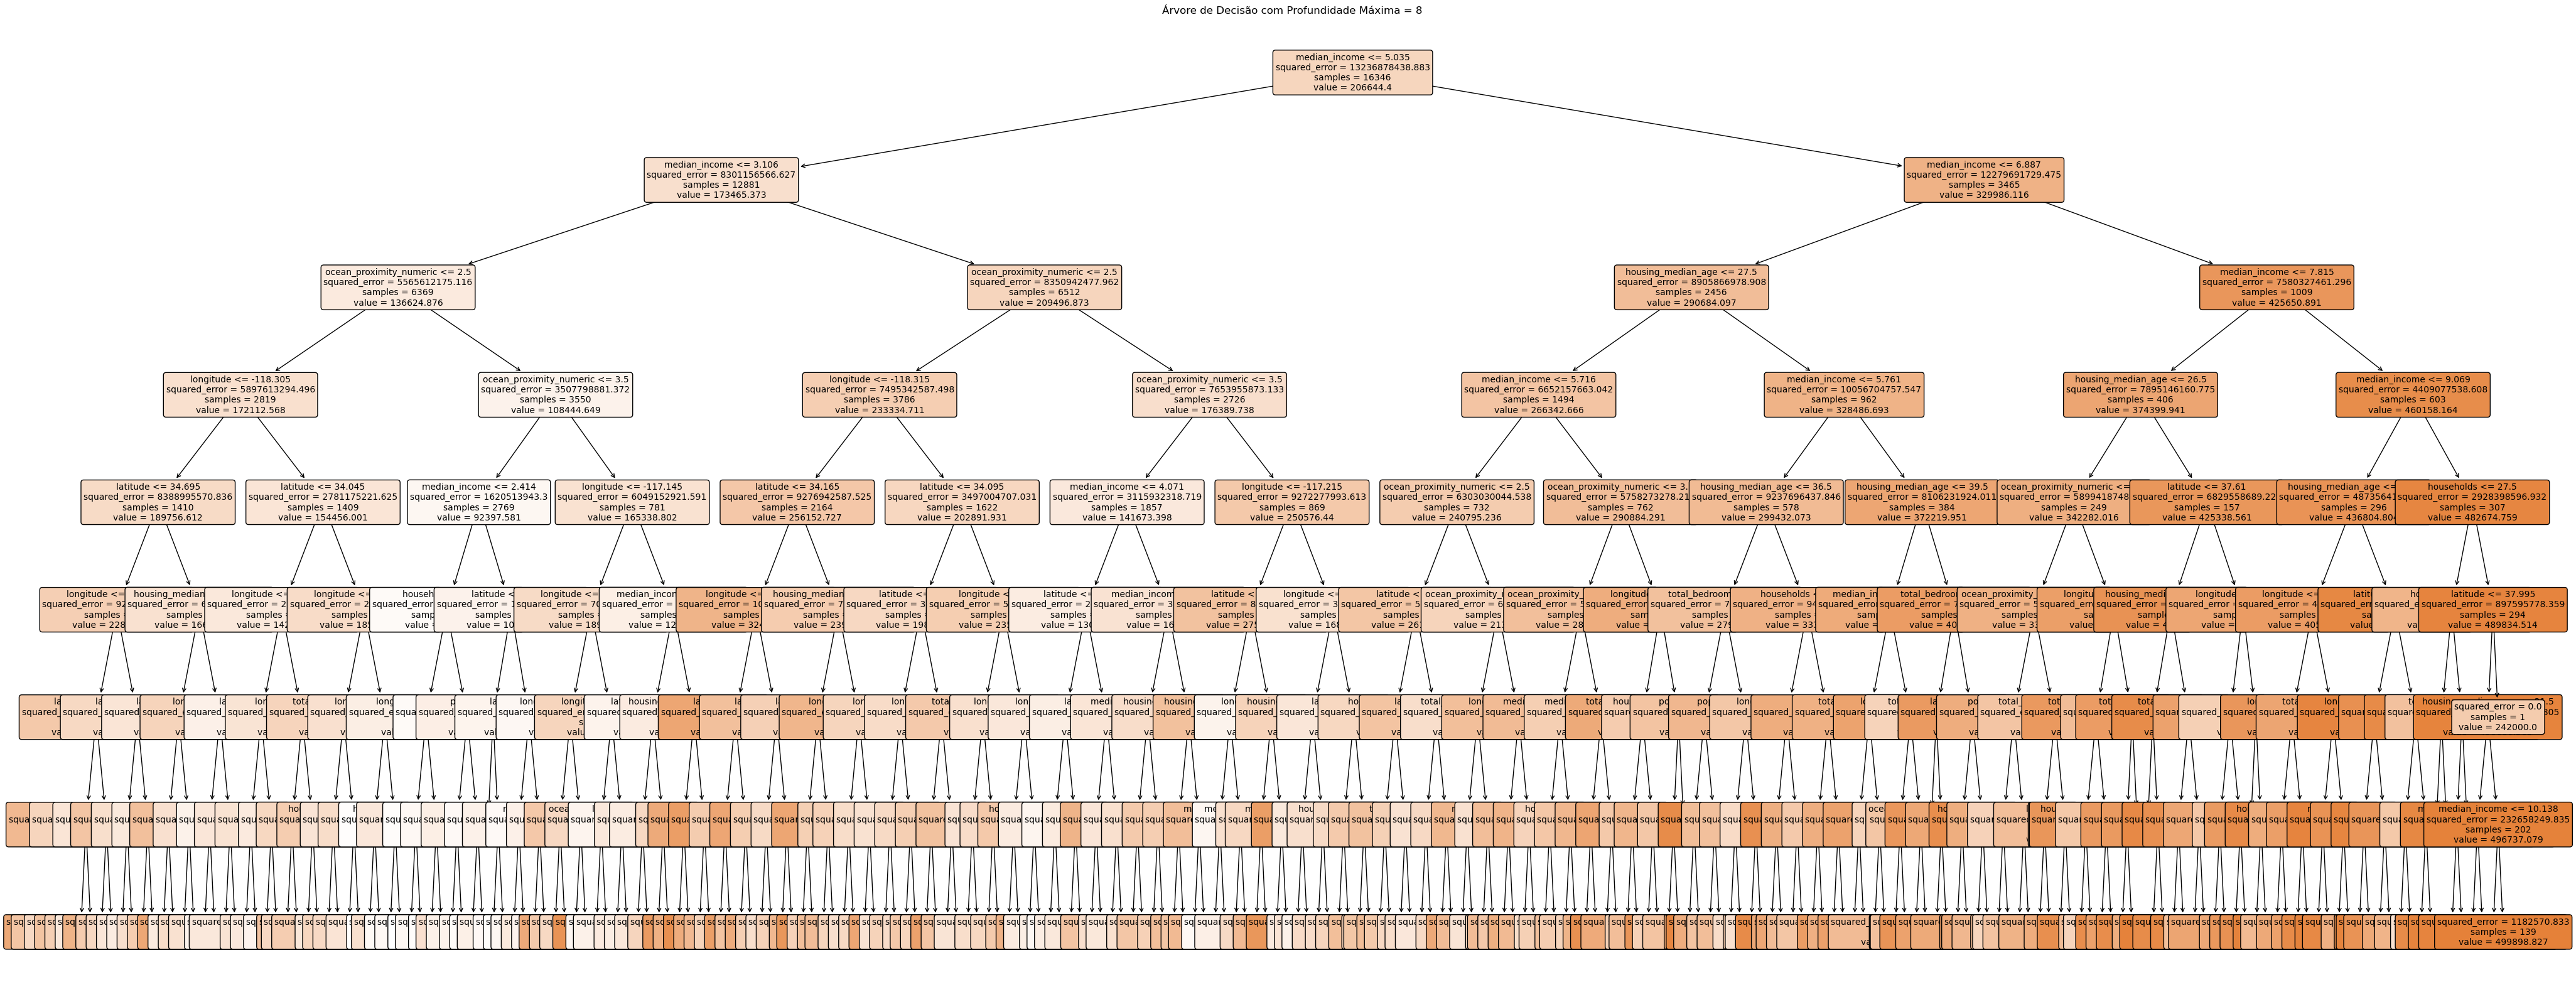

In [57]:
from sklearn.tree import plot_tree

# Visualizando a árvore com profundidade = 8
plt.figure(figsize=(50, 20))
plot_tree(arvore_8, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão com Profundidade Máxima = 8')
plt.show()

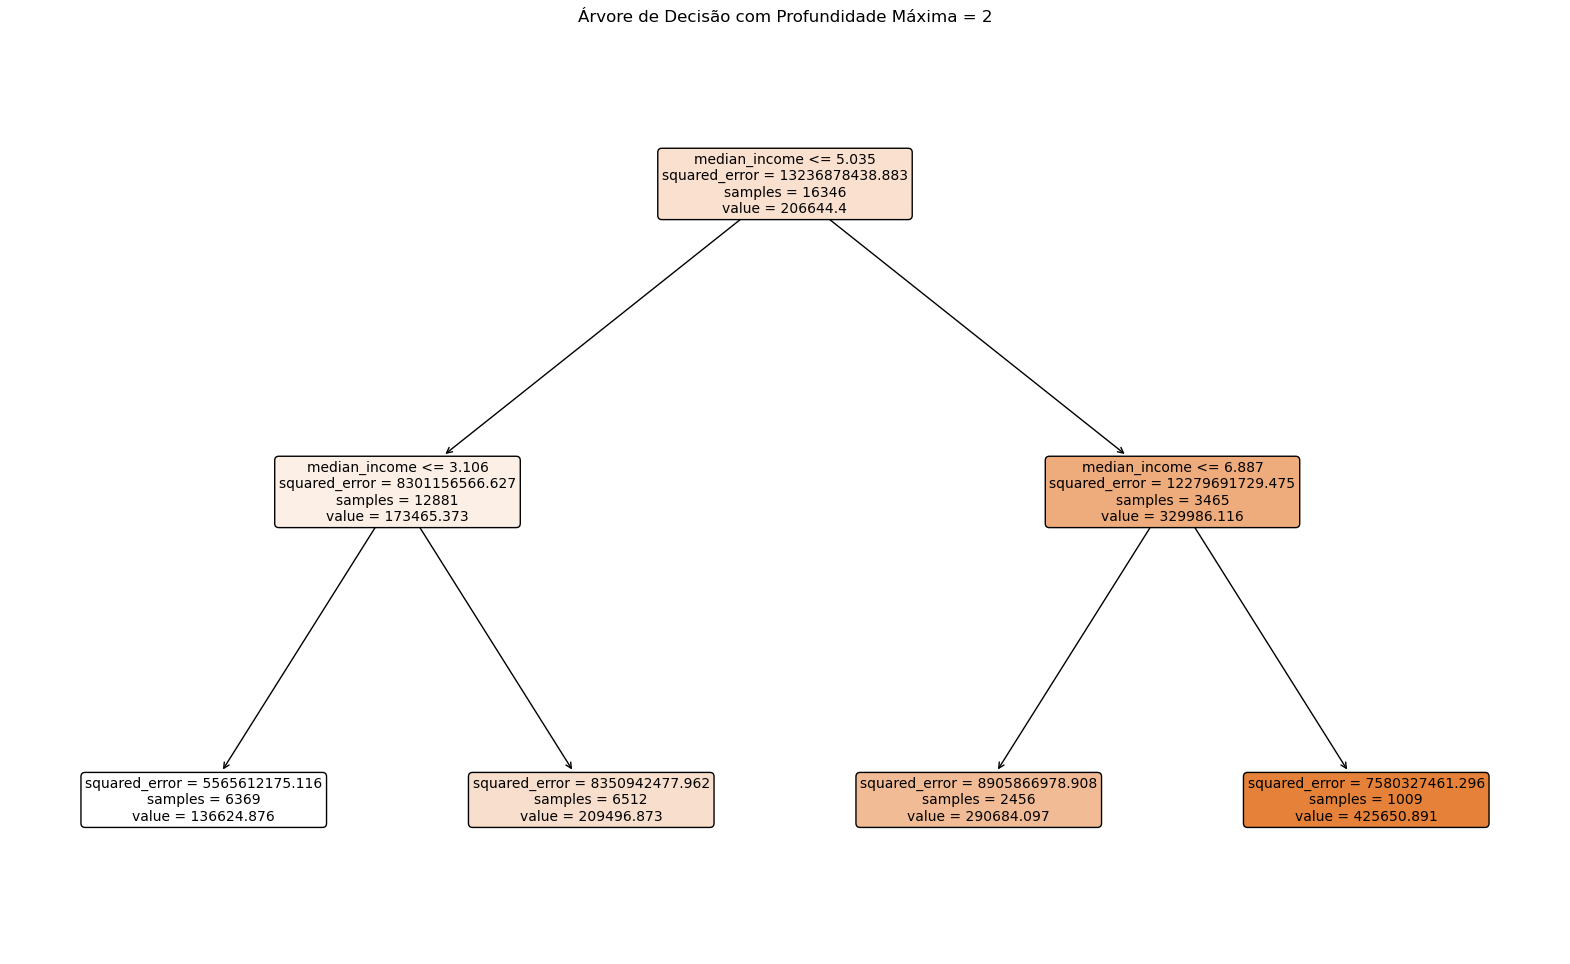

In [58]:
# Visualizando a árvore com profundidade = 2
plt.figure(figsize=(20, 12))
plot_tree(arvore_2, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão com Profundidade Máxima = 2')
plt.show()